# Gradient Descent for Logistic Regression

<img src="https://i2.wp.com/lh6.ggpht.com/-5RFMcz2bzWI/VA9NuUkB_vI/AAAAAAAAAdM/_DqqYO0nbX4/im2_thumb%25255B1%25255D.png"></img>

Gradient descent is the most important algorithm in machine learning (ML). It is used in almost all the ML models and is what differentiate traditional statistics from ML. By optimizing the parameters of the gradient descent we optimize the predictive model.
 
To understand gradient descent, we need to define some important concepts.
 
## Loss function

The loss function, also known as the cost function, is the measure we will use to calibrate the model. There are many types of loss functions. The selection of the loss function depends on the algorithm we want to run, and the question we want to answer (how we want to model the Y).
 
In logistic regression, the loss function difere from that of the linear regression. It is defined as follows:
 
<b> 
 Jϴ = - 𝞢(ylogŷ + (1-y)log(1-ŷ)) / n
</b> 
 
This mean that for y=0, the first part of the formula (ylogŷ) will be zero and the loss will equal to the right part. For y=1, the right part will be zero and the loss will be equal to the left part of the formula.


In [1]:
import numpy as np
import pandas as pd

In [2]:
mtcars = pd.read_csv("mtcars.csv")
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
def loss_function(y, y_hat):
    yminus = [i * -1 for i in y]
    return( sum((yminus*np.log(y_hat)) - ((1-y)*np.log(1-y_hat)))/len(y))



## Global Minima
The global minima of the loss function is defined as the smallest value of the loss function. In other words, we find the global minima when we reduce the error at the lowest possible value.

<img src="https://cdn-images-1.medium.com/max/602/0*gWBpMIJ7yRVAaAIA."></img>

## Learning rate
 
The learning rate can be defined as the number of 'jumps' we make when trying to reduce the global minima while calculating the optimal values for the weights. We have to be careful with this parameter because a high value may miss out the global minima, while a very low value will increase a lot the calculation time. The learning rate parameter in many functions is called as <b> alpha </b>.

<table><tr>
    <td cols="2"> 
        <h2> Problems caused by too low or high learning rates </h2> 
    </td>
    </tr><tr>
    <td> 
        <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSDZHOlr8UTVvLoA3adcxB7FQsVPusBU7lPSsVB-lunzaEPwahAQg" width="400" height="200"></img> 
        <br> <h4> High Learning Rate </h4>
    </td>
    <td> 
        <img src="https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0403.png" width="400" height="200"></img> 
        <br> <h4> Low Learning Rate </h4>
    </td>
</tr></table>

## Gradient Descent
 
The formula for the calculation of the gradient descent is:
 
<img src="https://i2.wp.com/2.bp.blogspot.com/-ZxJ87cWjPJ8/TtLtwqv0hCI/AAAAAAAAAV0/9FYqcxJ6dNY/s320/gradient+descent+algorithm+OLS.png?zoom=1.25&resize=320%2C181"></img>
 
This means that the values of the weights (called theta or ϴ) are calculated using the loss function (Jϴ).
 
The initial theta values are generated randomly and the loss function is calculated using them. The calculation is made as follows:
 
 
<center>
    h<sub>ϴ</sub>(X) = Y-hat = ϴ<sub>0</sub> + x<sub>1</sub>ϴ<sub>1</sub> + … + x<sub>n</sub>ϴ<sub>n</sub>
</center>
 
Then the loss function is calculated. If the model did not converged (the global minima was not reached), we increase/decrease theta by the learning rate, and recalculate the newly predicted Y (Y-hat). This is repeated until the global minima is reached.
 
<sub></sXb>(x)

In [7]:
### sigmoid function
def sigmoid(z):
    return(1/(1+np.exp(-z)))


In [8]:
def grad(x, y, yhat):
    n = len(y)
    grad = ((1 / n) * (sum((yhat - y) * x)))
    return(grad)


In [9]:
### The gradient descent requires two values: learning rate and number of iterations.
def gradientDesc(x, y, learn_rate=1e-6, max_iter=1e3):
  x = np.array(x)
  y = np.array(y)
  conv_threshold = 1e-4
  n = len(y)
  m = 1 # runif(1, 0, 1)
  c = 1 #runif(1, 0, 1)
  yhat = sigmoid(m * x + c)
  cost = loss_function(y,yhat)
  converged = False
  iterations = 0
  while(converged == False):
    ## Implement the gradient descent algorithm
    m_new = m - learn_rate * grad(x, y, yhat)
    c_new = c - learn_rate * grad(1, y, yhat)
    m = m_new
    c = c_new
    yhat = sigmoid(m * x + c)
    cost_new = loss_function(y,yhat)
    if(cost - cost_new <= conv_threshold):
      converged = True
      print("Optimal intercept: %f | Optimal slope: %f | loss: %f" % (c,m,cost_new))
      return(pd.DataFrame({'w':[m],'b':[c],'loss':[cost_new]},columns=['w','b','loss']))
    
    iterations = iterations + 1
    if(iterations > max_iter):
      converged = True
      print("Optimal intercept: %f | Optimal slope: %f | loss: %f" % (c,m,cost_new))
      return(pd.DataFrame({'w':[m],'b':[c],'loss':[cost_new]},columns=['w','b','loss']))


In [10]:
# Run the function 
gradientDesc(mtcars.wt, mtcars.am, 1e-3, 5e6)


Optimal intercept: 12.036189 | Optimal slope: -4.022647 | loss: 0.299626


,w,b,loss
0,-4.022647,12.036189,0.299626


In [233]:
## iterating with the learning rate
res = pd.DataFrame()
#learning_rate = [5e-1,1e-1,5e-2,1e-2,5e-3,1e-3,5e-4,1e-4,5e-5,1e-5,5e-6,1e-6,5e-7,1e-7]
learning_rate = [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7]
for lr in learning_rate:
    gd = gradientDesc(mtcars.wt, mtcars.am, lr, 500000)
    gd['learning_rate'] = [lr]
    res = res.append(gd)



Optimal intercept: 12.040370 | Optimal slope: -4.023970 | loss: 0.299626
Optimal intercept: 12.036189 | Optimal slope: -4.022648 | loss: 0.299626
Optimal intercept: 9.130555 | Optimal slope: -3.101721 | loss: 0.307521
Optimal intercept: 3.139999 | Optimal slope: -1.192544 | loss: 0.424757
Optimal intercept: 0.999994 | Optimal slope: 0.999978 | loss: 2.853146
Optimal intercept: 0.999999 | Optimal slope: 0.999998 | loss: 2.853192
Optimal intercept: 1.000000 | Optimal slope: 1.000000 | loss: 2.853197


In [234]:
res = res.sort_values('learning_rate')
res

,w,b,loss,learning_rate
0,1.000000,1.000000,2.853197,1.000000e-07
0,0.999998,0.999999,2.853192,1.000000e-06
0,0.999978,0.999994,2.853146,1.000000e-05
0,-1.192544,3.139999,0.424757,1.000000e-04
0,-3.101721,9.130555,0.307521,1.000000e-03
0,-4.022648,12.036189,0.299626,1.000000e-02
0,-4.023970,12.040370,0.299626,1.000000e-01


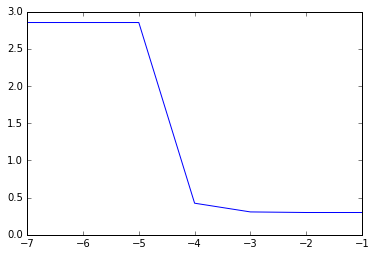

In [235]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

plt.plot(np.log10(res.learning_rate), res.loss)


In [236]:
#learning_rate = [1e-5,2e-5,3e-5,5e-5,6e-5,7e-5,8e-5,9e-5,1e-4,2e-4,3e-4,5e-4,6e-4,7e-4,8e-4,9e-4,1e-3]
learning_rate = [1e-4,2e-4,3e-4,5e-4,6e-4,7e-4,8e-4,9e-4,
                   1e-3,2e-3,3e-3,5e-3,6e-3,7e-3,8e-3,9e-3,
                   1e-2,2e-2,3e-2,5e-2,6e-2,7e-2,8e-2,9e-2,
                   0.9,0.8,0.7,0.6,0.5,0.4,0.2,0.1]

In [237]:
res = pd.DataFrame()
for lr in learning_rate:
    gd = gradientDesc(mtcars.wt, mtcars.am, lr, 500000)
    gd['learning_rate'] = [lr]
    res = res.append(gd)



Optimal intercept: 3.139999 | Optimal slope: -1.192544 | loss: 0.424757
Optimal intercept: 4.650516 | Optimal slope: -1.673185 | loss: 0.373780
Optimal intercept: 5.706900 | Optimal slope: -2.010663 | loss: 0.348992
Optimal intercept: 7.151887 | Optimal slope: -2.471961 | loss: 0.325592
Optimal intercept: 7.680803 | Optimal slope: -2.640538 | loss: 0.319412
Optimal intercept: 8.126636 | Optimal slope: -2.782501 | loss: 0.315024
Optimal intercept: 8.508648 | Optimal slope: -2.904043 | loss: 0.311804
Optimal intercept: 8.840105 | Optimal slope: -3.009428 | loss: 0.309381
Optimal intercept: 9.130555 | Optimal slope: -3.101721 | loss: 0.307521
Optimal intercept: 10.791026 | Optimal slope: -3.628471 | loss: 0.300924
Optimal intercept: 11.455085 | Optimal slope: -3.838765 | loss: 0.299899
Optimal intercept: 11.901331 | Optimal slope: -3.979984 | loss: 0.299641
Optimal intercept: 11.971656 | Optimal slope: -4.002233 | loss: 0.299630
Optimal intercept: 12.006301 | Optimal slope: -4.013193 | lo

          w          b      loss  learning_rate
0 -1.192544   3.139999  0.424757         0.0001
0 -1.673185   4.650516  0.373780         0.0002
0 -2.010663   5.706900  0.348992         0.0003
0 -2.471961   7.151887  0.325592         0.0005
0 -2.640538   7.680803  0.319412         0.0006
0 -2.782501   8.126636  0.315024         0.0007
0 -2.904043   8.508648  0.311804         0.0008
0 -3.009428   8.840105  0.309381         0.0009
0 -3.101721   9.130555  0.307521         0.0010
0 -3.628471  10.791026  0.300924         0.0020
0 -3.838765  11.455085  0.299899         0.0030
0 -3.979984  11.901331  0.299641         0.0050
0 -4.002233  11.971656  0.299630         0.0060
0 -4.013193  12.006301  0.299627         0.0070
0 -4.018618  12.023451  0.299627         0.0080
0 -4.021310  12.031961  0.299626         0.0090
0 -4.022648  12.036189  0.299626         0.0100
0 -4.023969  12.040366  0.299626         0.0200
0 -4.023970  12.040370  0.299626         0.0300
0 -4.023970  12.040370  0.299626        

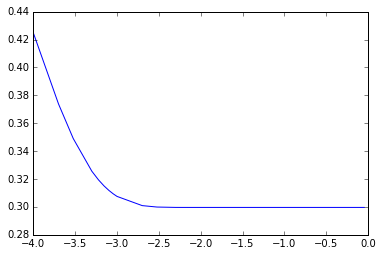

In [238]:
res = res.sort_values('learning_rate')
print(res)
plt.plot(np.log10(res.learning_rate), res.loss)


In [239]:
## iterating with the number of iterations
res = pd.DataFrame()
number_iterations = [1e1,5e2,1e2,5e3,1e3,5e4,1e4,5e5,1e5,5e6,1e6,1e7]

for iter in number_iterations:
    gd = gradientDesc(mtcars.wt, mtcars.am, 1e-3, iter)
    gd['num_iter'] = [iter]
    res = res.append(gd)


Optimal intercept: 0.993709 | Optimal slope: 0.975983 | loss: 2.797165
Optimal intercept: 0.759288 | Optimal slope: 0.048482 | loss: 0.896305
Optimal intercept: 0.942947 | Optimal slope: 0.781438 | loss: 2.348038
Optimal intercept: 0.928882 | Optimal slope: -0.505785 | loss: 0.547013
Optimal intercept: 0.692838 | Optimal slope: -0.309695 | loss: 0.585409
Optimal intercept: 3.140042 | Optimal slope: -1.192558 | loss: 0.424755
Optimal intercept: 1.244321 | Optimal slope: -0.601690 | loss: 0.525263
Optimal intercept: 9.130555 | Optimal slope: -3.101721 | loss: 0.307521
Optimal intercept: 4.650545 | Optimal slope: -1.673194 | loss: 0.373780
Optimal intercept: 12.036189 | Optimal slope: -4.022647 | loss: 0.299626
Optimal intercept: 10.791021 | Optimal slope: -3.628469 | loss: 0.300924
Optimal intercept: 12.040366 | Optimal slope: -4.023969 | loss: 0.299626


          w          b      loss    num_iter
0  0.975983   0.993709  2.797165        10.0
0  0.781438   0.942947  2.348038       100.0
0  0.048482   0.759288  0.896305       500.0
0 -0.309695   0.692838  0.585409      1000.0
0 -0.505785   0.928882  0.547013      5000.0
0 -0.601690   1.244321  0.525263     10000.0
0 -1.192558   3.140042  0.424755     50000.0
0 -1.673194   4.650545  0.373780    100000.0
0 -3.101721   9.130555  0.307521    500000.0
0 -3.628469  10.791021  0.300924   1000000.0
0 -4.022647  12.036189  0.299626   5000000.0
0 -4.023969  12.040366  0.299626  10000000.0


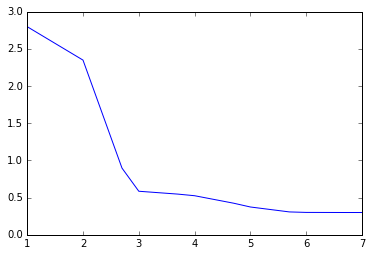

In [240]:
res = res.sort_values('num_iter')
print(res)
plt.plot(np.log10(res.num_iter), res.loss)
